Jahnvi Shah
<br>2018130047

##Experiment 1

**Objective**: To carry out linear regression (including multiple regression) and build a regression model using Python Platform

Case studies to consider:

1) Estimating horse fatalities from colic- use logistic regression to try to predict if a horse with colic will live or die

2) Predict a car's fuel economy from its physical parameters such as weight and engine size and power

##Part A) Logistic Regression

Part-A: Simple linear regression and Multiclass linear regression with data preprocessing (Handling NA values)

Use the case study relevant csv and files to build the models and evaluate the models.

General Steps:

1. Load the dataset (Use pandas )

2. Data Preprocessing (Handling NA values)

3. Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib

4. Data Partition (80% for training and 20% for testing) (Use scikit-learn)

5. Build the model (use scikit learn)

6. Summarize the model.

7. Prediction

8. Evaluate the model

9. Tuning the model

Calculate the performance metrics-Accuracy, Miss-classification rate, Receiver operating characteristics.

###1. Load the dataset (Use pandas)

In [2]:
!pip install kaggle
!pip install scikit-plot
import scikitplot as skplt

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jahnvishah","key":"c0971e640e1d29659cb2697c2f32b9d1"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d uciml/horse-colic

  0% 0.00/11.0k [00:00<?, ?B/s]
100% 11.0k/11.0k [00:00<00:00, 9.50MB/s]


In [5]:
!unzip horse-colic.zip

Archive:  horse-colic.zip
  inflating: datadict.txt            
  inflating: horse.csv               


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
data = pd.read_csv('/content/horse.csv')

In [8]:
data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

###2. Data Preprocessing (Handling NA values)

In [10]:
data=data.drop(columns= ['nasogastric_reflux_ph','abdomo_protein','abdomo_appearance'])
data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,45.0,8.4,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,50.0,85.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,33.0,6.7,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,48.0,7.2,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,absent,distend_small,44.0,NaN,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,decreased,distend_large,60.0,6.8,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,absent,distend_small,50.0,6.0,lived,yes,2208,0,0,yes


In [11]:
data.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data'],
      dtype='object')

In [12]:
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,45.0,8.4,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,50.0,85.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,33.0,6.7,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,48.0,7.2,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,died,no,4300,0,0,no


In [13]:
# Categorize categorical features
binary_features = [
        'surgery',
        'age',
        'surgical_lesion',
        'cp_data'
]


positive_values = [
        'yes',
        'adult',
        'yes',
        'yes'
    ]
    
ordinal_features = [
        'temp_of_extremities',
        'peripheral_pulse',
        'capillary_refill_time',
        'pain',
        'peristalsis',
        'abdominal_distention',
        'nasogastric_tube',
        'nasogastric_reflux',
        'rectal_exam_feces'    
    ]
    
orderings = [
        ['cold', 'cool', 'normal', 'warm'],
        ['absent', 'reduced', 'normal', 'increased'],
        ['less_3_sec', '3', 'more_3_sec'],
        ['alert', 'depressed', 'mild_pain', 'severe_pain', 'extreme_pain'],
        ['absent', 'hypomotile', 'normal', 'hypermotile'],
        ['none', 'slight', 'moderate', 'severe'],
        ['none', 'slight', 'significant'],
        ['none', 'less_1_liter', 'more_1_liter'],
        ['absent', 'decreased', 'normal', 'increased']
    ]
    
nominal_features = [
        'mucous_membrane',
        'abdomen',
    ]
    
prefixes = [
        'MM',
        'AB',
        'AA'
    ]

In [14]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [15]:
# Fill missing values
for column in data.columns:
  if column in data.select_dtypes('object').columns:
    if column not in nominal_features:
      data[column] = data[column].fillna(data[column].mode()[0])
  else:
    data[column] = data[column].fillna(data[column].mean())

In [16]:
# Encode categorical feature columns
data = binary_encode(data, columns=binary_features, positive_values=positive_values)
data = ordinal_encode(data, columns=ordinal_features, orderings=orderings)
data = onehot_encode(data, columns=nominal_features, prefixes=prefixes)

In [17]:
# Encode labels
label_mapping = {'lived': 0, 'died': 1, 'euthanized': 2}
data['outcome'] = data['outcome'].replace(label_mapping)

###3. Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib

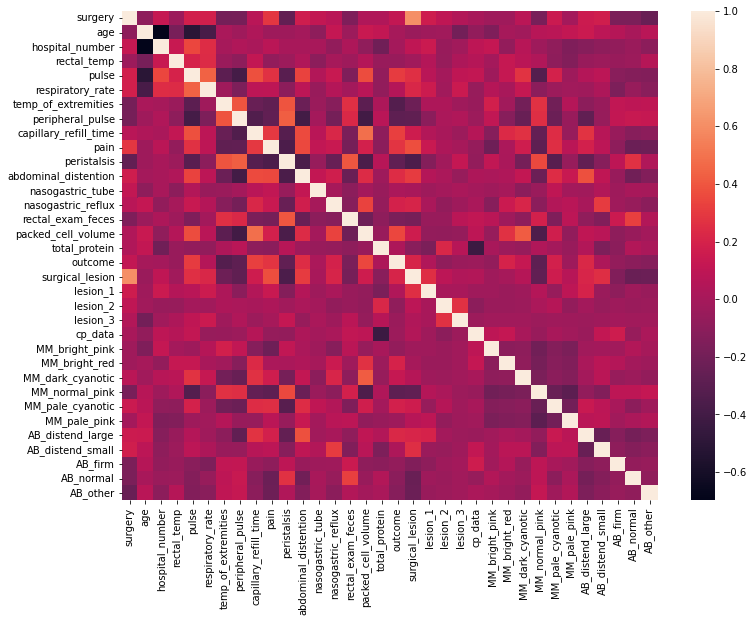

In [18]:
plt.figure(figsize=(12,9))
sns.heatmap(data=data.corr(),annot=False)
plt.show()

In [19]:
# removing columns having less correlation with outcome feature
correlation_data = data.corr()
correlation_values = correlation_data['outcome'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
#for col in range(len(correlation_values)):
#    if abs(correlation_values[col]) < 0.24:
#        data = data.drop([correlation_values.index[col]], axis=1)
#data

In [20]:
data.outcome.unique()

array([1, 2, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    178
1     77
2     44
Name: outcome, dtype: int64
1    275
0     24
Name: age, dtype: int64
2    122
1     59
4     42
3     38
0     38
Name: pain, dtype: int64


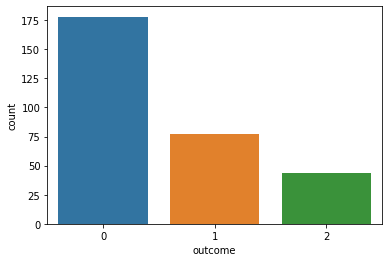

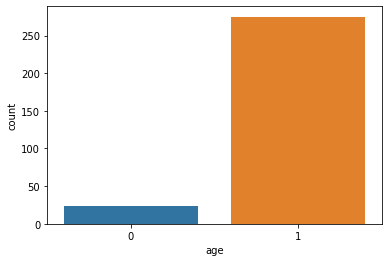

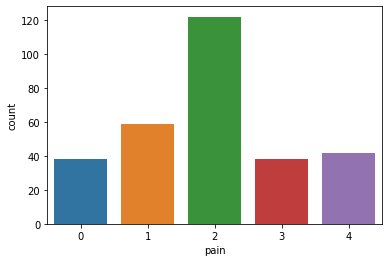

In [21]:
plt.figure()
sns.countplot(data["outcome"])
print(data["outcome"].value_counts())

plt.figure()
sns.countplot(data["age"])
print(data["age"].value_counts())

plt.figure()
sns.countplot(data["pain"])
print(data["pain"].value_counts())

###4. Data Partition (80% for training and 20% for testing) (Use scikit-learn)

In [22]:
# Split data into X and y
y = data['outcome'].copy()
X = data.drop('outcome', axis=1).copy()

In [23]:
# Scale X with a standard scaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=121)

###5. Build the model (use scikit learn)


In [25]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### 7. Prediction


In [26]:
y_pred = classifier.predict(X_test)

###8. Evaluate the model


In [27]:
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.7166666666666667


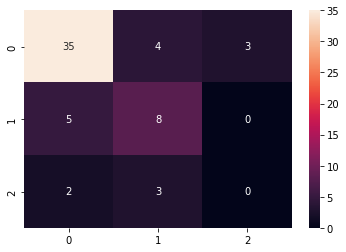

In [28]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.53      0.62      0.57        13
           2       0.00      0.00      0.00         5

    accuracy                           0.72        60
   macro avg       0.46      0.48      0.47        60
weighted avg       0.70      0.72      0.71        60



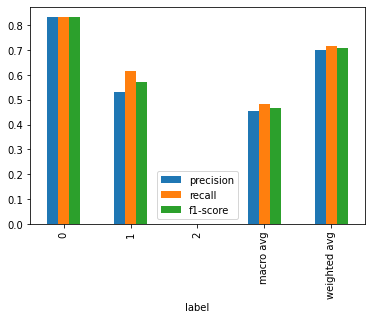

In [30]:

# Build a DataFrame from the classification_report output_dict.
report_data = []
for label, metrics in classification_report(y_test, y_pred.round(), output_dict=True).items():
  if label!= 'accuracy':
    metrics['label'] = label
    report_data.append(metrics)

report_df = pd.DataFrame(
    report_data, 
    columns=['label', 'precision', 'recall', 'f1-score', 'support']
)

# Plot as a bar chart.
report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')

###9. Tuning the model

In [31]:
LR = LogisticRegression(multi_class='multinomial')
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [32]:
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, verbose = 3, cv=5)
# fitting the model for grid search 
LR_search.fit(X , y)

Fitting 5 folds for each of 735 candidates, totalling 3675 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=0.1, max_iter=100, penalty=l1, solver=saga;, score=0.661 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.729 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.617 total time=   0.1s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.750 total time=   0.1s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.650 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.683 total time=   0.1s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.695 total time=   0.1s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.1s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.667 total time=   0.1s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.600 total time=   0.1s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.695 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.667 total time=   0.1s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.600 total time=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.600 total time=   0.1s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.695 total time=   0.1s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.667 total time=   0.1s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.600 total time=   0.1s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.695 total time=   0.1s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,



[CV 1/5] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1, m

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.750 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.650 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.683 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.695 total time=   0.3s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.1s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.667 total time=   0.1s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.600 total time=   0.1s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.695 total time=   0.1s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.600 total time=   0.1s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.695 total time

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.695 total time=   0.1s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.617 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.733 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.667 total time=   0.2s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.600 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.695 total time=   0.3s
[CV 1/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=1, max_iter=300, penalty=l1, solver=saga;, score=0.617 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=1, max_iter=300, penalty=l1, solver=saga;, score=0.767 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1, max_iter=300, penalty=l1, solver=saga;, score=0.650 total time=   0.3s
[CV 4/5] END C=1, max_iter=300, penalty=l1, solver=saga;, score=0.683 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=1, max_iter=300, penalty=l1, solver=saga;, score=0.695 total time=   0.3s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.1s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.600 total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.695 total time=   0.1s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.600 total time=   0.1s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.695 total time

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.617 total time=   0.6s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.767 total time=   0.4s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.650 total time=   0.2s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.683 total time=   0.2s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.695 total time=   0.4s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.1s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.1s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.667 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.600 total time=   0.1s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.695 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.617 total time=   

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.617 total time=   0.4s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.767 total time=   0.3s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.650 total time=   0.2s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.683 total time=   0.2s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.695 total time=   0.3s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.1s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.1s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.600 total time=   0.1s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.695 total time=   0.1s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.617 total time=   

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.733 total time=   0.1s
[CV 3/5] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.600 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.695 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.678 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.750 to

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=saga;, score=0.617 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=saga;, score=0.733 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=saga;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=saga;, score=0.617 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=saga;, score=0.678 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=elas

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.683 total time=   0.1s
[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.600 total time=   0.1s
[CV 5/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.695 total time=   0.1s
[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.678 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.678 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=na

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=sag;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=sag;, score=0.617 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=sag;, score=0.678 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.733 total time=   0.1s
[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.667 total time=   0.1s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=10, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penal

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=10, max_iter=200, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l1, solver

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.733 total time=   0.1s
[CV 3/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.683 total time=   0.1s
[CV 4/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.617 total time=   0.1s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,



[CV 5/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.678 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.67

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.683 total time=   0.1s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.617 total time=   0.1s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.678 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.733 total time=   0.1s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.667 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_i

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.617 total time=   0.1s
[CV 2/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.683 total time=   0.1s
[CV 4/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.678 total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.678

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.733 total time=   0.1s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.683 total time=   0.1s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=10, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.617 total time=   0.2s
[CV 2/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.683 total time=   0.2s
[CV 4/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.617 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.695 total time=   0.2s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.678 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.1s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.678

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.683 total time=   0.1s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] E

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.617 total time=   0.2s
[CV 2/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.733 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.683 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.617 total time=   0.2s
[CV 5/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.695 total time=   0.2s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.1s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.678 total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.617 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.617 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.733 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.683 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.633 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.695 total time=   0.2s
[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.678 total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.1s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.678

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=100, max_iter=100, penalty=l1, solver=saga;, score=0.678 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.1s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.678 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.678 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.617 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.733 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.667 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.617 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.678 total t

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.733 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.683 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.617 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.678 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=100, max_iter=200, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.617 total time=   0.1s
[CV 2/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.667 total time=   0.1s
[CV 4/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.617 total time=   0.1s
[CV 5/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.1s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.678 total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.1s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.1s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.678 total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=liblinear

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.617 total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.733 total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.683 total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.617 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.678 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.733 total time=   0.1s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.667 total time=   0.1s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=100, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.617 total time=   0.1s
[CV 2/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.733 total time=   0.1s
[CV 3/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.683 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.617 total time=   0.1s
[CV 5/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.1s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.678 total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.1s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=sag;, score=0.683 total time=   0.1s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=sag;, score=0.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=sag;, score=0.678 total time=   0.1s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.683 total time=   0.1s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, m

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=100, max_iter=300, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l1, solver=lbfgs;, score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.733 total time=   0.1s
[CV 3/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.683 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.617 total time=   0.1s
[CV 5/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.678 total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.1s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.678 total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=liblinear

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=sag;, score=0.617 total time=   0.1s
[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=sag;, score=0.683 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=sag;, score=0.617 total time=   0.1s
[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=sag;, score=0.678 total time=   0.1s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.733 total time=   0.1s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.683 total time=   0.1s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.617 total time=   0.2s
[CV 2/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.733 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.683 total time=   0.2s
[CV 4/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.617 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.678 total time=   0.2s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.678 total time=   0.1s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.1s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.683 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.617 total time=   0.1s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.678 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.683 total time=   0.1s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=100, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.617 total time=   0.2s
[CV 2/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.733 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.683 total time=   0.2s
[CV 4/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.617 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.678 total time=   0.2s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.678 total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.1s
[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.1s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.683 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.617 total time=   0.1s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.678 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.617 total time=   0.2s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.733 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.683 total time=   0.1s
[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.678 total time=   0.2s
[CV 1/5] END C=100, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.617 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.733 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.683 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.617 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.678 total time=   0.2s
[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.678 total time=   0.1s
[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.1s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.1s
[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.683 total time=   0.1s
[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.617 total time=   0.1s
[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.678 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.617 total time=   0.2s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.733 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.683 total time=   0.2s
[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.617 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.678 total time=   0.2s
[CV 1/5] END C=100, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.617 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.678 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=sag;, score=0.617 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=sag;, score=0.733 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=sag;, scor

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=sag;, score=0.617 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=sag;, score=0.678 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.617 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.733 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.683 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.617 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.678 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=elasti

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=elasticnet, solver=sag;, score=nan total time=  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=1000, max_iter=200, penalty=l1, solver=saga;, score=0.733 total time=   0.1s
[CV 3/5] END C=1000, max_iter=200, penalty=l1, solver=saga;, score=0.667 total time=   0.1s
[CV 4/5] END C=1000, max_iter=200, penalty=l1, solver=saga;, score=0.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=1000, max_iter=200, penalty=l1, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.661 total time=   0.1s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solv

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=sag;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=sag;, score=0.617 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=sag;, score=0.678 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=saga;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=saga;, score=0.667 total time=   0.1s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=1000, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] EN

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1000, max_iter=300, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.733 total time=   0.1s
[CV 3/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.683 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.661 total time=   0.1s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.661 total time=   0.1s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solve

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=sag;, score=0.617 total time=   0.1s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=sag;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=sag;, score=0.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=sag;, score=0.661 total time=   0.1s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=1000, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] EN

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.733 total time=   0.1s
[CV 3/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.683 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.678 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.1s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.1s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.661 total time=   0.1s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, sol

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=sag;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=sag;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=sag;, score=0.661 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.678 total time=   0.1s
[CV 1/5] END C=1000, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=1000, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=elasticnet, solver=liblinear;, score=nan total tim

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.617 total time=   0.2s
[CV 2/5] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.733 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.683 total time=   0.2s
[CV 4/5] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.617 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.678 total time=   0.2s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.661 total time=   0.1s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solv

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.683 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.661 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.661 total time=   0.1s
[CV 1/5] END C=1000, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.617 total time=   0.2s
[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.733 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.683 total time=   0.2s
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.617 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.661 total time=   0.2s
[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.661 total time=   0.1s
[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solv

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.683 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.661 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.733 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.617 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.661 total time=   0.2s
[CV 1/5] END C=1000, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.617 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.733 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.683 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.617 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.661 total time=   0.2s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.683 total time=   0.1s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.617 total time=   0.1s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solv

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.617 total time=   0.2s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.683 total time=   0.2s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.661 total time=   0.2s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.617 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.733 total time=   0.2s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.683 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.617 total time=   0.2s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.661 total time=   0.2s
[CV 1/5] END C=1000, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2450 fits failed out of a total of 3675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
245 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [33]:
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Best Parameters: %s' % LR_search.best_params_)

Mean Accuracy: 0.689
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [34]:
LR_tuned = LogisticRegression(**LR_search.best_params_, multi_class='multinomial')
LR_tuned.fit(X_train, y_train)

LogisticRegression(C=0.1, multi_class='multinomial', solver='newton-cg')

In [35]:
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 71.667 %


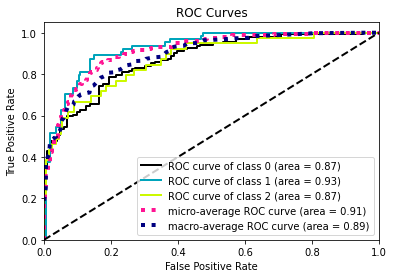

In [36]:
# printing ROC curve for Logistic Regression model
logit_scores_prob = LR_tuned.predict_proba(X_train)
skplt.metrics.plot_roc(y_train, logit_scores_prob)
plt.show()

## Part B) Linear Regression

###1. Load the dataset (Use pandas)

In [39]:
# importing dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
data1 = pd.read_csv('drive/MyDrive/Datasets/Car/auto-mpg.csv', na_values = "?", comment = "\t", skipinitialspace = True) 

df1=pd.DataFrame(data1)

Mounted at /content/drive


In [40]:
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [42]:
df1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [43]:
df1.shape

(398, 9)

###2. Data Preprocessing

In [44]:
print(df1.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [45]:
#replacing NA values of hoursepower column with mean value
df1["horsepower"] = df1["horsepower"].fillna(df1["horsepower"].mean())

print(df1.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [46]:
# drop car name column
df1.drop(['car name'], inplace = True, axis = 1)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


###3. Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib

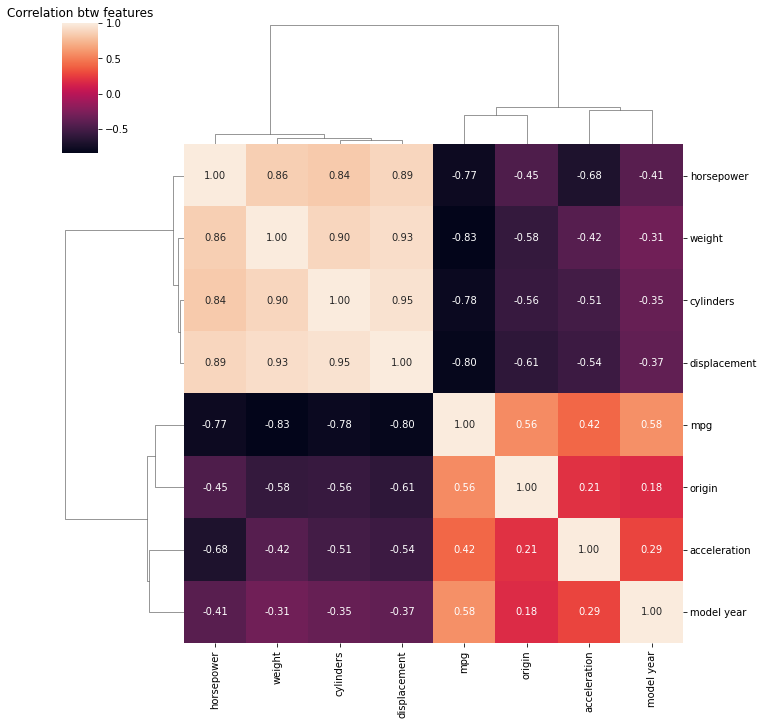

In [47]:
corr_matrix = df1.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()

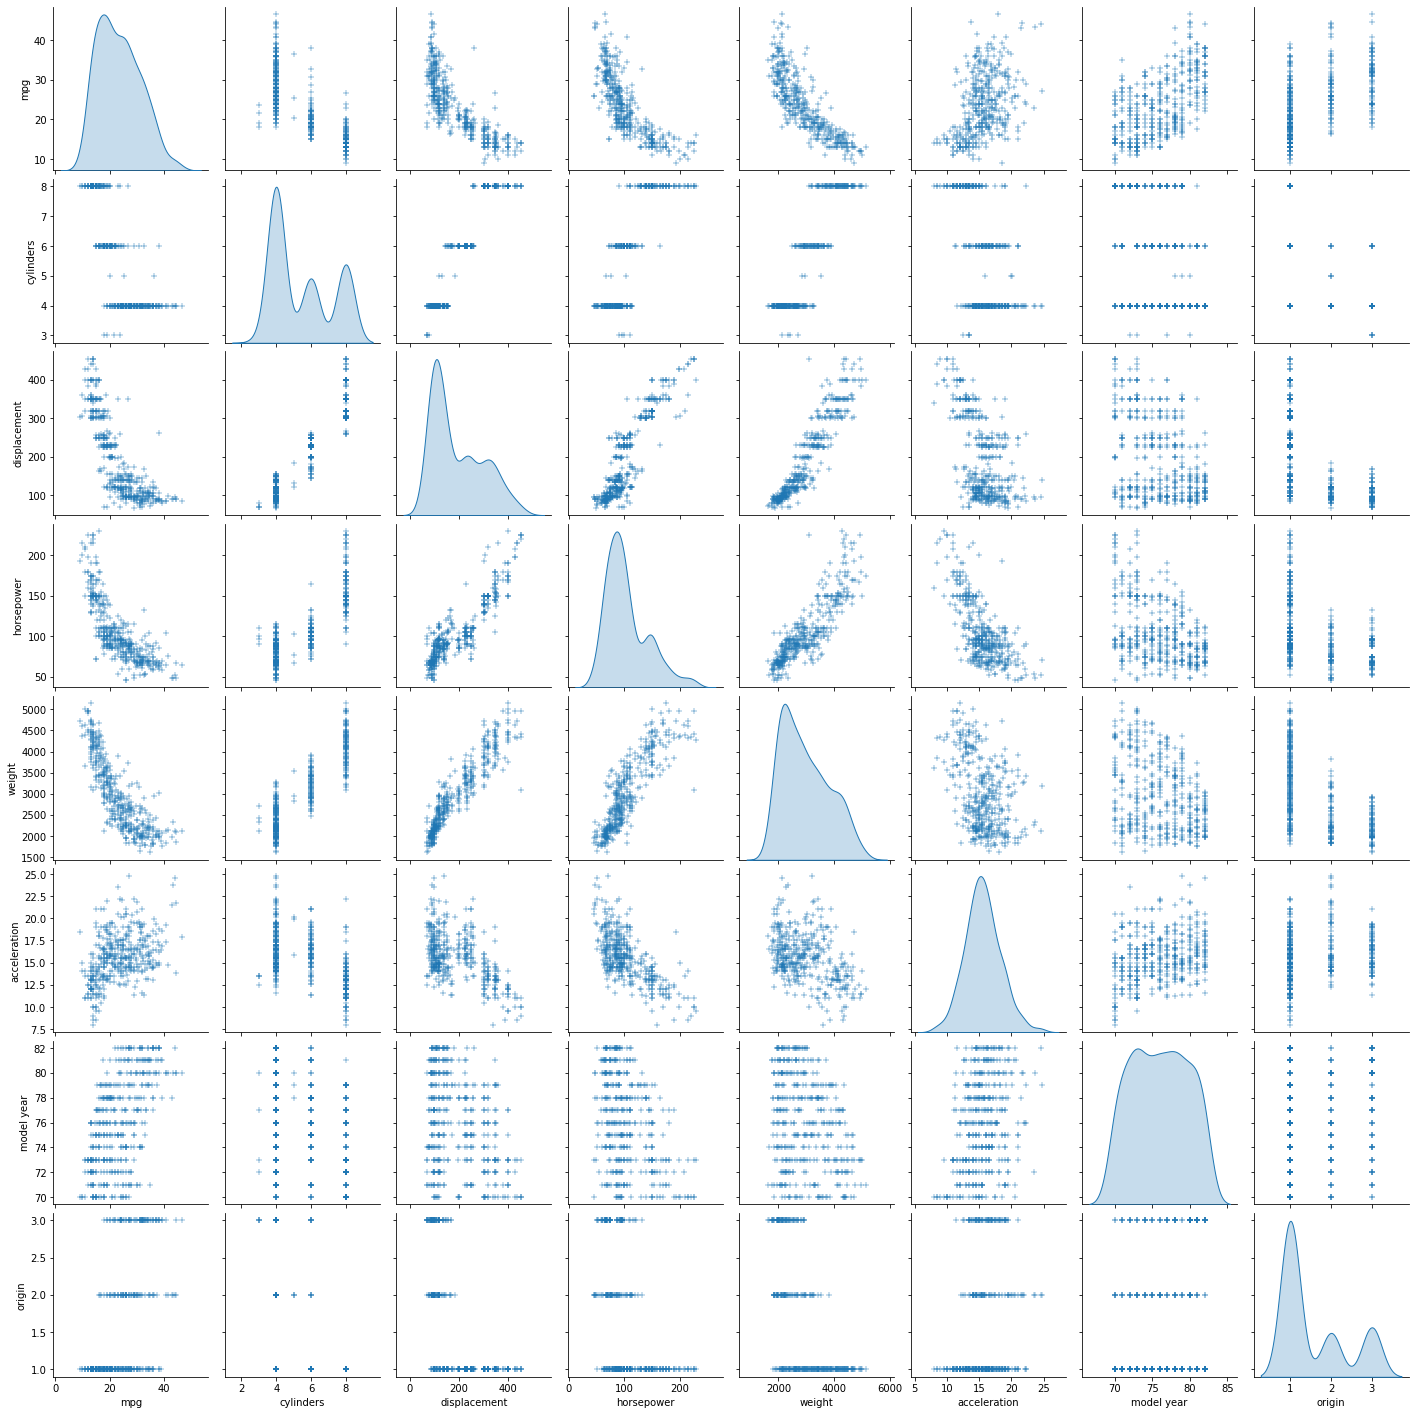

In [48]:
#pair plot
sns.pairplot(df1, diag_kind = "kde", markers = "+")
plt.show()

# Observation: 
# 1. Distribution of cylinder with other variables suggest that cylinder is a categorical feature
# 2. Distribution of origin with other variables suggest that origin is a categorical feature
# 3. Data is highly skewed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64
1    249
3     79
2     70
Name: origin, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


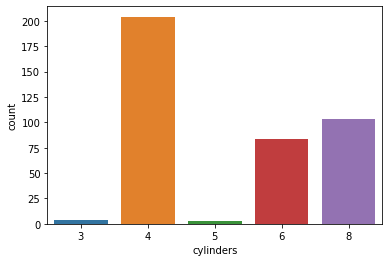

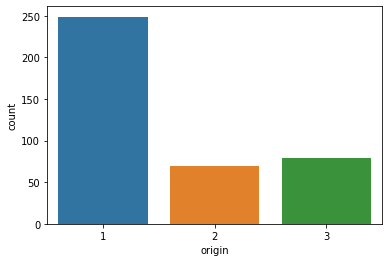

In [49]:
plt.figure()
sns.countplot(df1["cylinders"])
print(df1["cylinders"].value_counts())

plt.figure()
sns.countplot(df1["origin"])
print(df1["origin"].value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py

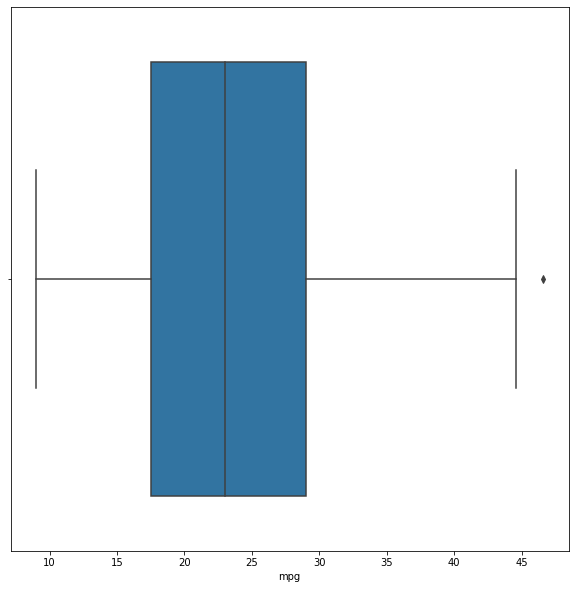

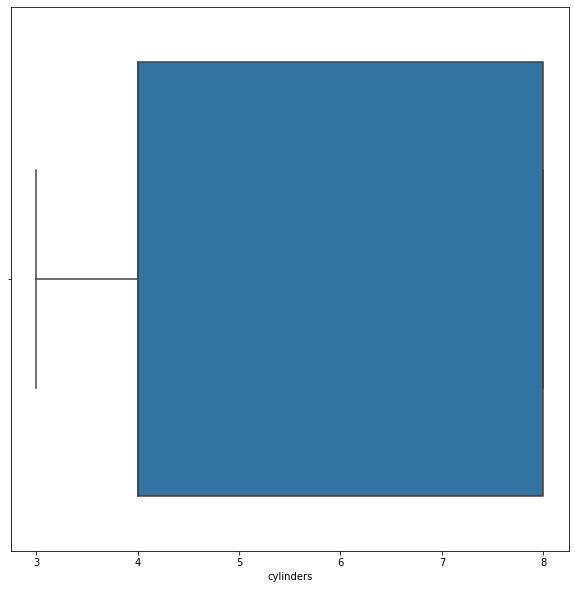

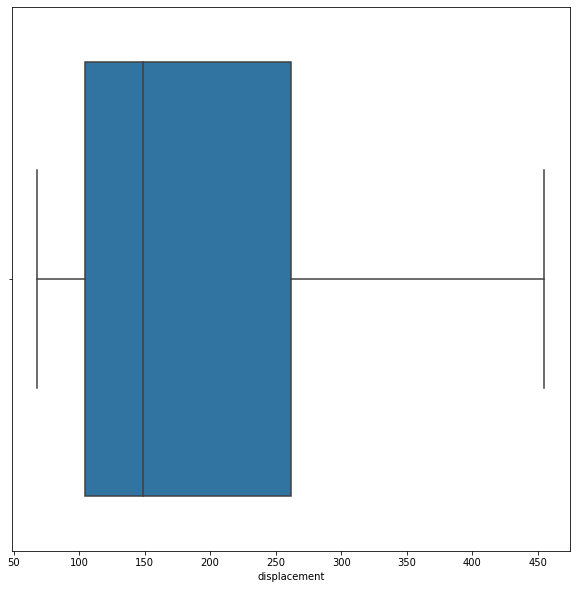

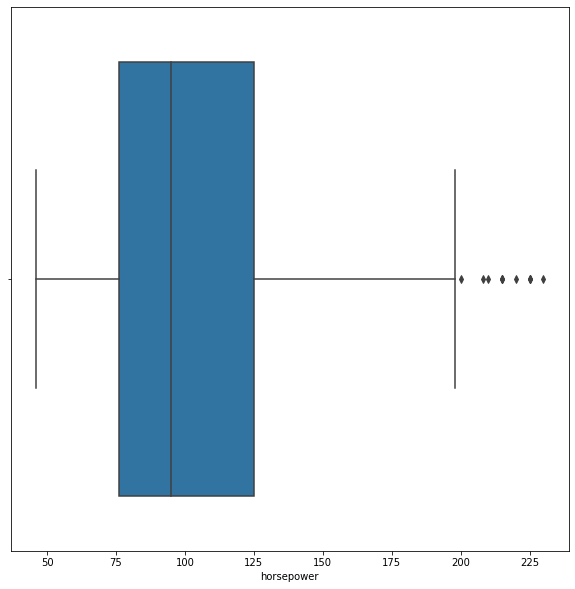

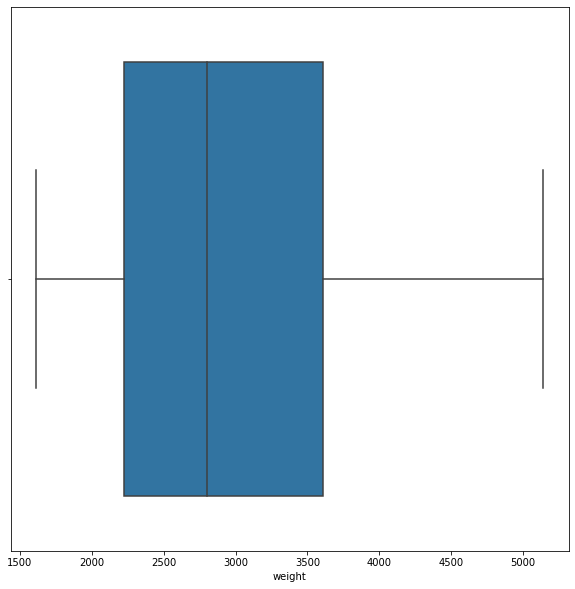

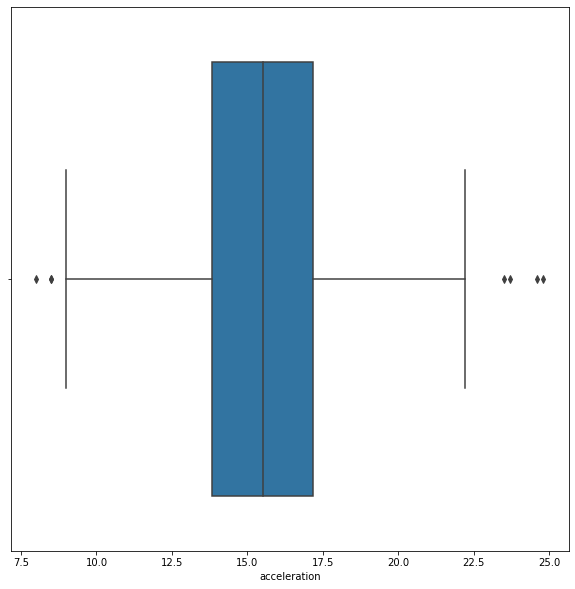

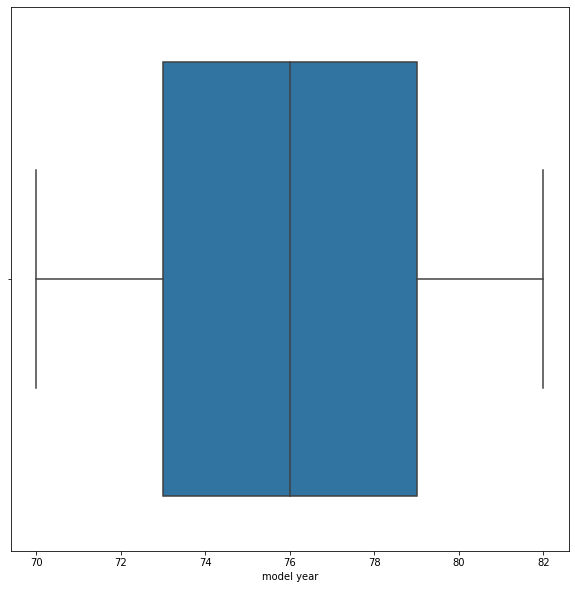

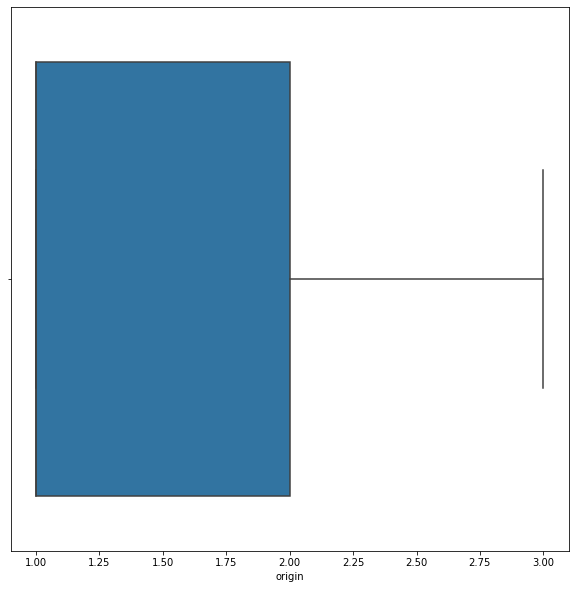

In [50]:
# box plot of all features
for i in df1.columns:
    plt.figure(figsize=(10,10))
    sns.boxplot(x = i, data = df1, orient = "v")

# Observation: 
# 1. horsepower and acceleration feature have outliers

In [51]:
#handling outliers

quartile1 = df1["horsepower"].quantile(0.25)
quartile3 = df1["horsepower"].quantile(0.75)
interquantile_range = quartile3 - quartile1
up_limit = quartile3 + 1.5 * interquantile_range
low_limit = quartile1 - 1.5 * interquantile_range
filter_hp_low = low_limit < df1["horsepower"]
filter_hp_up = df1["horsepower"] < up_limit
filter_hp = filter_hp_low & filter_hp_up
df1 = df1[filter_hp]
df1


quartile1 = df1["acceleration"].quantile(0.25)
quartile3 = df1["acceleration"].quantile(0.75)
interquantile_range = quartile3 - quartile1
up_limit = quartile3 + 1.5 * interquantile_range
low_limit = quartile1 - 1.5 * interquantile_range
filter_acc_low = low_limit < df1["acceleration"]
filter_acc_up = df1["acceleration"] < up_limit
filter_acc = filter_hp_low & filter_hp_up
df1 = df1[filter_acc]
df1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [52]:
from scipy.stats import skew 
skewed_feats = df1.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness

,skewed
origin,0.877245
horsepower,0.845446
displacement,0.704874
cylinders,0.600536
weight,0.564478
mpg,0.457094
acceleration,0.377968
model year,-0.015764


In [53]:
#converting categorical features to numeric using one hot encoding
df1.columns = df1.columns.str.strip()
df1["cylinders"] = df1["cylinders"].astype(str)  
df1["origin"] = df1["origin"].astype(str) 
df1 = pd.get_dummies(df1)

In [54]:
df1

,mpg,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,18.0,307.0,130.0,3504,12.0,70,0,0,0,0,1,1,0,0
1,15.0,350.0,165.0,3693,11.5,70,0,0,0,0,1,1,0,0
2,18.0,318.0,150.0,3436,11.0,70,0,0,0,0,1,1,0,0
3,16.0,304.0,150.0,3433,12.0,70,0,0,0,0,1,1,0,0
4,17.0,302.0,140.0,3449,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,82,0,1,0,0,0,1,0,0
394,44.0,97.0,52.0,2130,24.6,82,0,1,0,0,0,0,1,0
395,32.0,135.0,84.0,2295,11.6,82,0,1,0,0,0,1,0,0
396,28.0,120.0,79.0,2625,18.6,82,0,1,0,0,0,1,0,0


###4. Data Partition (80% for training and 20% for testing) (Use scikit-learn)

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV 

X = df1.drop(["mpg"], axis = 1)
y = df1.mpg

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
X

,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,307.0,130.0,3504,12.0,70,0,0,0,0,1,1,0,0
1,350.0,165.0,3693,11.5,70,0,0,0,0,1,1,0,0
2,318.0,150.0,3436,11.0,70,0,0,0,0,1,1,0,0
3,304.0,150.0,3433,12.0,70,0,0,0,0,1,1,0,0
4,302.0,140.0,3449,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,140.0,86.0,2790,15.6,82,0,1,0,0,0,1,0,0
394,97.0,52.0,2130,24.6,82,0,1,0,0,0,0,1,0
395,135.0,84.0,2295,11.6,82,0,1,0,0,0,1,0,0
396,120.0,79.0,2625,18.6,82,0,1,0,0,0,1,0,0


In [56]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###5. Build the Model

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

###6. Prediction and Evaluation

In [58]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [59]:
lr_score=regressor.score(X_test, y_test)
print("The accuracy  is: " ,lr_score)

The accuracy  is:  0.8414354650870962


In [60]:
#Coefficient of determination
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8414354650870962

##Conclusion:
I understood logistic and linear regression and was able to implement it on a real world problem. I learned that linear regression has no hyperparameters hence it cannot be tuned. I also understood that performing logarithmic transformation on skewed variable helps in increasing the accuracy of the model.    